In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec
from natsort import natsorted
from collections import defaultdict
import scipy.stats as stats

In [2]:
chemokineLigands = {
"I-309": "CCL1",
"MCP-1": "CCL2",
"MIP-1A": "CCL3",
"MIP-1B": "CCL4",
"RANTES": "CCL5",
"MCP-3": "CCL7",
"MCP-2": "CCL8",
"Eotaxin-1": "CCL11",
"MCP-4": "CCL13",
"HCC-1": "CCL14",
"HCC-2": "CCL15",
"LEC": "CCL16",
"TARC": "CCL17",
"MIP-4": "CCL18",
"MIP-3B": "CCL19",
"MIP-3A": "CCL20",
"Exodus-2": "CCL21",
"MDC": "CCL22",
"MPIF-1": "CCL23",
"Eotaxin-2": "CCL24",
"TECK": "CCL25",
"Eotaxin-3": "CCL26",
"CTACK": "CCL27",
"MECK": "CCL28",
"GROA": "CXCL1",
"GROB": "CXCL2",
"GROG": "CXCL3",
"PF-4": "CXCL4",
"ENA-78": "CXCL5",
"GCP-2": "CXCL6",
"NAP-2": "CXCL7",
"IL-8": "CXCL8",
"MIG": "CXCL9",
"IP-10": "CXCL10",
"ITAC": "CXCL11",
"SDF-1A": "CXCL12",
"BCA": "CXCL13",
"BRAK": "CXCL14",
"CXCL16": "CXCL16",
"CXCL17": "CXCL17",
"Fractalkine": "CX3CL1",
"Lympotactin": "XCL1",
"SCM-1B": "XCL2"
}

chemokineReceptors = {
"ACKR1": "ACKR1",
"ACKR2": "ACKR2",
"ACKR3": "ACKR3",
"ACKR4": "ACKR4",
"CCRL2": "CCRL2",
"CCR1": "CCR1",
"CCR2": "CCR2",
"CCR3": "CCR3",
"CCR4": "CCR4",
"CCR5": "CCR5",
"CCR6": "CCR6",
"CCR7": "CCR7",
"CCR8": "CCR8",
"CCR9": "CCR9",
"CCR10": "CCR10",
"CXCR1": "CXCR1",
"CXCR2": "CXCR2",
"CXCR3": "CXCR3",
"CXCR4": "CXCR4",
"CXCR5": "CXCR5",
"CXCR6": "CXCR6",
"GPR35": "GPR35",
"CX3CR1": "CX3CR1",
"XCR1": "XCR1"
}

#Bhusal, R. P., Eaton, J. R. O., Chowdhury, S. T., Power, C. A., Proudfoot, A. E. I., Stone, M. J., & Bhattacharya, S. (2020). Evasins: Tick Salivary Proteins that Inhibit Mammalian Chemokines. In Trends in Biochemical Sciences (Vol. 45, Issue 2, pp. 108–122). Elsevier Ltd. https://doi.org/10.1016/j.tibs.2019.10.003
lr_interactions = [("CCL1", "CCR2", "AG"),
("CCL1", "CCR8", "AG"),
("CCL2", "ACKR1", "U"),
("CCL2", "ACKR2", "U"),
("CCL2", "CCR2", "AG"),
("CCL2", "CCR3", "AG"),
("CCL2", "CCR5", "AG"),
("CCL3", "ACKR2", "U"),
("CCL3", "CCR1", "AG"),
("CCL3", "CCR5", "AG"),
("CCL4", "ACKR2", "U"),
("CCL4", "CCR1", "AN"),
("CCL4", "CCR5", "AG"),
("CCL5", "ACKR1", "U"),
("CCL5", "ACKR2", "U"),
("CCL5", "CCR1", "AG"),
("CCL5", "CCR3", "AG"),
("CCL5", "CCR5", "AG"),
("CCL5", "CXCR3", "AG"),
("CCL7", "ACKR1", "U"),
("CCL7", "ACKR2", "U"),
("CCL7", "CCR1", "AG"),
("CCL7", "CCR2", "AG"),
("CCL7", "CCR3", "AG"),
("CCL7", "CCR5", "AN"),
("CCL7", "CXCR3", "AN"),
("CCL8", "ACKR2", "U"),
("CCL8", "CCR1", "AG"),
("CCL8", "CCR2", "AG"),
("CCL8", "CCR3", "AG"),
("CCL8", "CCR5", "AN"),
("CCL11", "ACKR1", "U"),
("CCL11", "ACKR2", "U"),
("CCL11", "CCR2", "AG"),
("CCL11", "CCR3", "AG"),
("CCL11", "CCR5", "AG"),
("CCL11", "CXCR3", "AN"),
("CCL13", "ACKR2", "U"),
("CCL13", "CCR2", "AG"),
("CCL13", "CCR3", "AG"),
("CCL13", "CCR5", "AG"),
("CCL13", "CXCR3", "AG"),

("CCL13", "ACKR2", "U"),
("CCL13", "CCR1", "AG"),
("CCL13", "CCR2", "AG"),
("CCL13", "CCR3", "AG"),
("CCL13", "CCR5", "AG"),
("CCL13", "CXCR3", "AG"),

("CCL14", "ACKR1", "U"),
("CCL14", "ACKR2", "U"),
("CCL14", "CCR1", "AG"),
("CCL14", "CCR5", "AG"),                 

("CCL15", "CCR1", "AG"),
("CCL15", "CCR3", "AG"),

("CCL16", "CCR1", "AG"),
("CCL16", "CCR2", "AG"),
("CCL16", "CCR5", "AG"),

("CCL17", "ACKR1", "U"),
("CCL17", "ACKR2", "U"),
("CCL17", "CCR4", "AG"),

("CCL18", "CCR1", "AG"),
("CCL18", "CCR3", "AG"),

("CCL19", "ACKR4", "AG"),
("CCL19", "CCRL2", "AG"),
("CCL19", "CCR7", "AG"),
("CCL19", "CXCR3", "AG"),

("CCL20", "CCR6", "AG"),
("CCL20", "CXCR3", "AG"),

("CCL21", "CCR7", "AG"),
("CCL21", "ACKR4", "AG"),                   

("CCL22", "ACKR2", "AG"),
("CCL22", "CCR4", "AG"),

("CCL23", "CCR1", "AG"),

("CCL24", "CCR2", "AN"),
("CCL24", "CCR3", "AG"),

("CCL25", "ACKR4", "AG"),
("CCL25", "CCR9", "AG"),

("CCL26", "CCR2", "AN"),
("CCL26", "CCR3", "AG"),

("CCL27", "CCR10", "AG"),

("CCL28", "CCR3", "AG"),
("CCL28", "CCR10", "AG"),


("CXCL1", "CXCR1", "AG"),
("CXCL1", "CXCR2", "AG"),

("CXCL2", "CXCR2", "AG"),

("CXCL3", "CXCR2", "AG"),

("CXCL5", "ACKR1", "U"),
("CXCL5", "CXCR2", "AG"),


("CXCL6", "ACKR1", "U"),
("CXCL6", "CXCR1", "AG"),
("CXCL6", "CXCR2", "AG"),

("CXCL7", "CXCR2", "AG"),

("CXCL8", "ACKR1", "U"),
("CXCL8", "CXCR1", "AG"),
("CXCL8", "CXCR2", "AG"),

("CXCL9", "CCR3", "AN"),
("CXCL9", "CXCR3", "AG"),

("CXCL10", "CCR3", "AN"),
("CXCL10", "CXCR3", "AG"),


("CXCL11", "ACKR1", "U"),
("CXCL11", "ACKR3", "AG"),
("CXCL11", "CCR3", "AN"),
("CXCL11", "CXCR3", "AG"),

("CXCL12", "ACKR3", "AG"),
("CXCL12", "CXCR3", "AG"),
("CXCL12", "CXCR4", "AG"),

("CXCL13", "CXCR5", "AG"),

("CXCL16", "CXCR6", "AG"),

("CXCL17", "GPR35", "AG"),
                    
("CX3CL1", "CX3CR1", "AG"),

("XCL1", "XCR1", "AG"),
("XCL2", "XCR1", "AG")                 
]

#https://www.rndsystems.com/pathways/chemokine-superfamily-pathway-human-mouse-lig-recept-interactions
rndInteractions = [
#H
("CCL3", "CCR1", "AG"),
("CCL4", "CCR1", "AG"),
("CCL5", "CCR1", "AG"),
("CCL6", "CCR1", "AG"),
("CCL7", "CCR1", "AG"),
("CCL13", "CCR1", "AG"),
("CCL14", "CCR1", "AG"),
("CCL15", "CCR1", "AG"),
("CCL16", "CCR1", "AG"),
("CCL23", "CCR1", "AG"),
("CCL3L1", "CCR1", "AG"),
("CCL3L3", "CCR1", "AG"),
("CCL4L1", "CCR1", "AG"),
("CCL4L2", "CCR1", "AG"),


#M
("CCL3", "CCR1", "AG"),
("CCL4", "CCR1", "AG"),
("CCL5", "CCR1", "AG"),
("CCL6", "CCR1", "AG"),
("CCL7", "CCR1", "AG"),
("CCL9", "CCR1", "AG"),
("CCL10", "CCR1", "AG"),

#H
("CCL2", "CCR2", "AG"),
("CCL7", "CCR2", "AG"),
("CCL8", "CCR2", "AG"),
("CCL13", "CCR2", "AG"),
("CCL16", "CCR2", "AG"),
#M
("CCL2", "CCR2", "AG"),
("CCL7", "CCR2", "AG"),
("CCL12", "CCR2", "AG"),


#H
("CCL5", "CCR3", "AG"),
("CCL7", "CCR3", "AG"),
("CCL8", "CCR3", "AG"),
("CCL11", "CCR3", "AG"),
("CCL13", "CCR3", "AG"),
("CCL14", "CCR3", "AG"),
("CCL15", "CCR3", "AG"),
("CCL24", "CCR3", "AG"),
("CCL26", "CCR3", "AG"),
("CCL28", "CCR3", "AG"),
("CCL3L1", "CCR3", "AG"),
("CCL3L3", "CCR3", "AG"),
#M
("CCL5", "CCR3", "AG"),
("CCL7", "CCR3", "AG"),
("CCL9", "CCR3", "AG"),
("CCL10", "CCR3", "AG"),
("CCL11", "CCR3", "AG"),
("CCL24", "CCR3", "AG"),


#H/M
("CCL2", "CCR4", "AG"),
("CCL3", "CCR4", "AG"),
("CCL5", "CCR4", "AG"),
("CCL17", "CCR4", "AG"),
("CCL22", "CCR4", "AG"),

#H
("CCL3", "CCR5", "AG"),
("CCL4", "CCR5", "AG"),
("CCL5", "CCR5", "AG"),
("CCL8", "CCR5", "AG"),
("CCL11", "CCR5", "AG"),
("CCL13", "CCR5", "AG"),
("CCL14", "CCR5", "AG"),
("CCL16", "CCR5", "AG"),
("CCL3L1", "CCR5", "AG"),
("CCL3L3", "CCR5", "AG"),
("CCL4L1", "CCR5", "AG"),
("CCL4L2", "CCR5", "AG"),
#M
("CCL3", "CCR5", "AG"),
("CCL4", "CCR5", "AG"),
("CCL5", "CCR5", "AG"),

#H/M    
("CCL20", "CCR6", "AG"),

#H/M
("CCL19", "CCR7", "AG"),
("CCL21", "CCR7", "AG"),

#H
("CCL1", "CCR8", "AG"),
("CCL4", "CCR8", "AG"),
("CCL16", "CCR8", "AG"),
("CCL17", "CCR8", "AG"),
("CCL18", "CCR8", "AG"),

#M
("CCL1", "CCR8", "AG"),
("CCL8", "CCR8", "AG"),

#H/M
("CCL25", "CCR9", "AG"),

#H/M
("CCL27", "CCR10", "AG"),
("CCL28", "CCR10", "AG"),

#H
("CCL2", "CCR11", "AG"),
("CCL8", "CCR11", "AG"),
("CCL13", "CCR11", "AG"),
("CCL19", "CCR11", "AG"),
("CCL21", "CCR11", "AG"),
("CCL25", "CCR11", "AG"),

#M
("CCL19", "CCR11", "AG"),
("CCL21", "CCR11", "AG"),
("CCL25", "CCR11", "AG"),


("CCL18", "PITPNM3", "AG"), #H
("CCL19", "CCRL2", "AG"), #H/M

#H
("CCL2", "D6", "AG"),
("CCL3", "D6", "AG"),
("CCL4", "D6", "AG"),
("CCL5", "D6", "AG"),
("CCL7", "D6", "AG"),
("CCL8", "D6", "AG"),
("CCL11", "D6", "AG"),
("CCL13", "D6", "AG"),
("CCL14", "D6", "AG"),
("CCL17", "D6", "AG"),
("CCL22", "D6", "AG"),
("CCL3L1", "D6", "AG"),
#M
("CCL2", "D6", "AG"),
("CCL3", "D6", "AG"),


("XCL1", "XCR1", "AG"), #H
("XCL2", "XCR1", "AG"), #H
("XCL1", "XCR1", "AG"), #M

("CCL26", "CX3CR1", "AG"),#H
("CX3CL1", "CX3CR1", "AG"),#H
("CX3CL1", "CX3CR1", "AG"),#M


#H
("CXCL6", "CXCR1", "AG"),
("CXCL7", "CXCR1", "AG"),
("CXCL8", "CXCR1", "AG"),
#M
("CXCL7", "CXCR1", "AG"),
("LIX", "CXCR1", "AG"),

#H/M
("CXCL1", "CXCR2", "AG"),
("CXCL2", "CXCR2", "AG"),
("CXCL3", "CXCR2", "AG"),
("CXCL5", "CXCR2", "AG"),
("CXCL6", "CXCR2", "AG"),
("CXCL7", "CXCR2", "AG"),
("CXCL8", "CXCR2", "AG"),
("LIX", "CXCR2", "AG"),

#H/M
("CXCL4", "CXCR3", "AG"),
("CXCL9", "CXCR3", "AG"),
("CXCL10", "CXCR3", "AG"),
("CXCL11", "CXCR3", "AG"),
("CXCL13", "CXCR3", "AG"),
("CXCL4L1", "CXCR3", "AG"),

#H
("CXCL4", "CXCR3B", "AG"),
("CXCL9", "CXCR3B", "AG"),
("CXCL10", "CXCR3B", "AG"),
("CXCL11", "CXCR3B", "AG"),
("CXCL4L1", "CXCR3B", "AG"),

("CXCL12", "CXCR4", "AG"),
("CXCL13", "CXCR5", "AG"),
("CXCL16", "CXCR6", "AG"),
("CXCL11", "CXCR7", "AG"),
("CXCL12", "CXCR7", "AG"),

("CCL1", "DARC", "AG"),
("CCL2", "DARC", "AG"),
("CCL5", "DARC", "AG"),
("CCL7", "DARC", "AG"),
("CCL8", "DARC", "AG"),
("CCL11", "DARC", "AG"),
("CCL13", "DARC", "AG"),
("CCL14", "DARC", "AG"),
("CCL16", "DARC", "AG"),
("CCL17", "DARC", "AG"),
("CCL18", "DARC", "AG"),

("CXCL1", "DARC", "AG"),
("CXCL2", "DARC", "AG"),
("CXCL3", "DARC", "AG"),
("CXCL5", "DARC", "AG"),
("CXCL6", "DARC", "AG"),
("CXCL8", "DARC", "AG"),
("LIX", "DARC", "AG"),
("CXCL4", "DARC", "AG"),
("CXCL9", "DARC", "AG"),
("CXCL10", "DARC", "AG"),
("CXCL11", "DARC", "AG"),
("CXCL13", "DARC", "AG"),
]

lr_interactions += rndInteractions

ccLigands = [x[0] for x in lr_interactions]
ccReceptors = [x[1] for x in lr_interactions]

fun2val = {"AN": -1, "AG": 1, "U": 0}

{'width_ratios': [22, 23], 'height_ratios': [22, 23]}
{'width_ratios': [22, 23], 'height_ratios': [22, 23]}
{'width_ratios': [22, 23], 'height_ratios': [22, 23]}


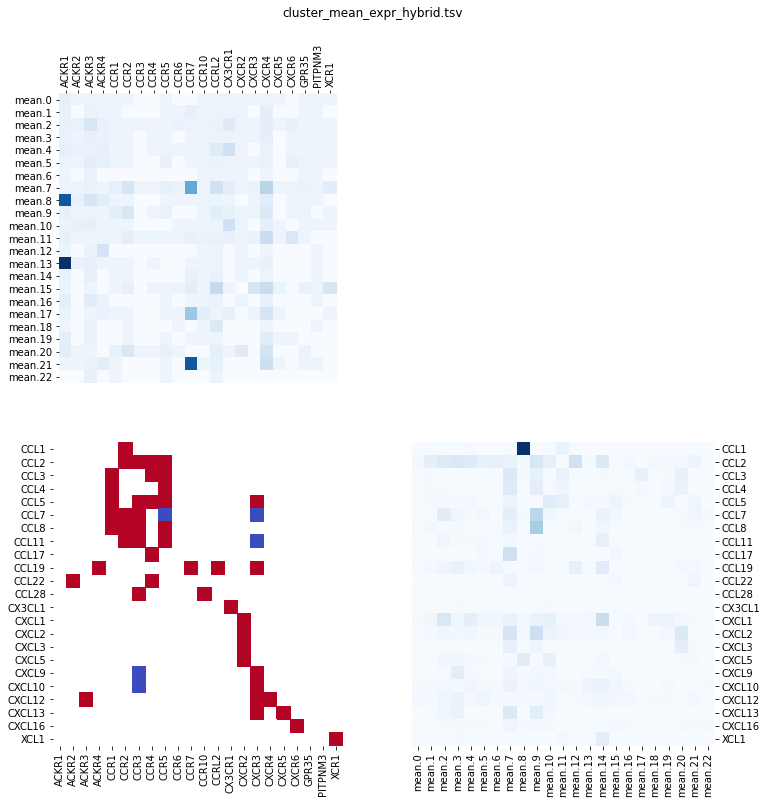

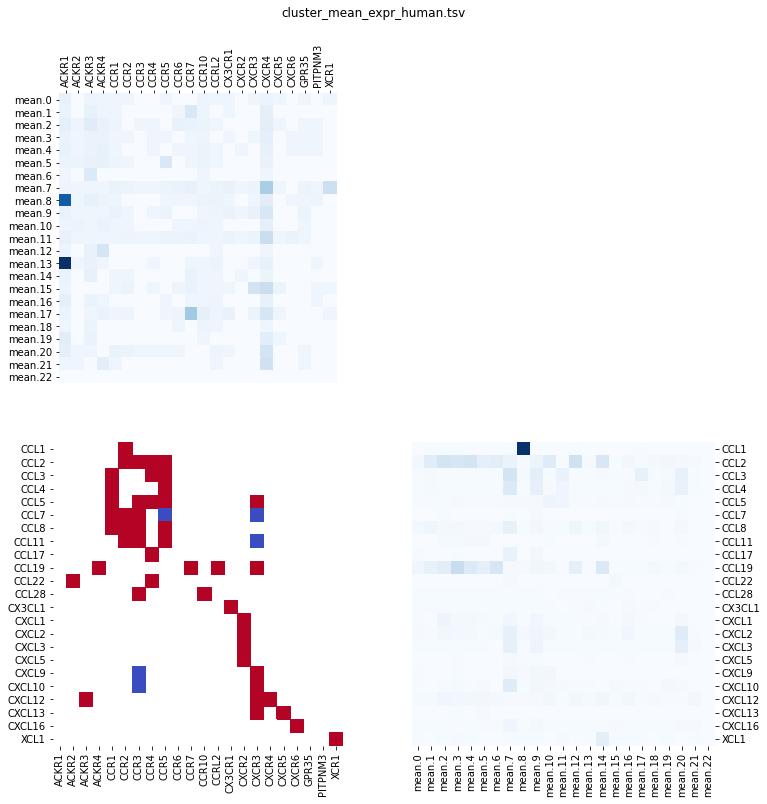

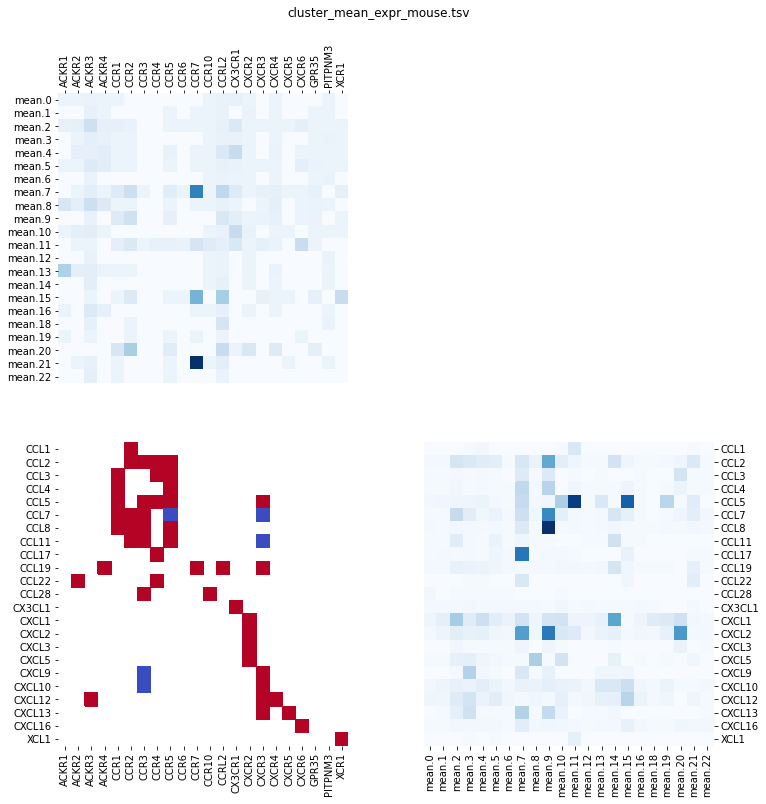

In [3]:
for inputfile in [ "test/cluster_mean_expr_hybrid.tsv","test/cluster_mean_expr_human.tsv","test/cluster_mean_expr_mouse.tsv" ]:
    
    #if not inputfile in ["../cellnames_mean_expression.counts.fire_ko_ni_cells.tsv"]:
    #    continue
    
    scExpr = pd.read_csv(inputfile, sep="\t")
    scExpr = scExpr.set_index("gene")
    scExpr = scExpr.apply(pd.to_numeric, errors='ignore')

    clusterNames = natsorted([x for x in scExpr.columns])
    
    containedLigs = natsorted([ x for x in scExpr.index if x.upper() in ccLigands ])
    exprLigands = scExpr.loc[containedLigs, clusterNames]

    containedRecs = natsorted([ x for x in scExpr.index if x.upper() in ccReceptors ])
    exprRecs = scExpr.loc[containedRecs, clusterNames]

    uLigs = [x.upper() for x in containedLigs]
    uRecs = [x.upper() for x in containedRecs]

    interactions = np.zeros((len(uLigs), len(uRecs)))

    for interaction in lr_interactions:

        if not interaction[0] in uLigs:
            continue

        if not interaction[1] in uRecs:
            continue

        pos = ( uLigs.index(interaction[0]), uRecs.index(interaction[1]) )

        interactions[pos[0], pos[1]] = fun2val[interaction[2]]
        
    idf = pd.DataFrame(interactions)  
    idf.columns = uRecs
    idf.index = uLigs
       

    lim1 = [0, len(containedRecs)]
    lim3 = [0, len(containedLigs)]

    gskw = dict(width_ratios = [np.diff(lim1)[0],np.diff(lim3)[0]],
                height_ratios= [np.diff(lim1)[0],np.diff(lim3)[0]])

    print(gskw)

    fig = plt.figure(figsize=(12,12))
    gs = matplotlib.gridspec.GridSpec(2,2, **gskw)
    ax1=fig.add_subplot(gs[0,0], aspect="equal",adjustable='box')
    ax3=fig.add_subplot(gs[1,0], aspect="equal",adjustable='box', sharex=ax1)
    ax2=fig.add_subplot(gs[1,1], aspect="equal",adjustable='box', sharey=ax3)

    sns.heatmap(exprRecs.transpose(),ax=ax1, cmap="Blues", cbar=False,xticklabels=True, yticklabels=True)
    sns.heatmap(exprLigands,ax=ax2, cmap="Blues", cbar=False,xticklabels=True, yticklabels=True)

    sns.heatmap(idf, mask=idf.to_numpy()==0,ax=ax3, cmap="coolwarm", cbar_ax=None, cbar=False,xticklabels=True, yticklabels=True)

    ax2.tick_params(bottom=True, top=False, labeltop=False,labelbottom=True,left=False, right=True, labelright=True, labelleft=False)
    ax2.tick_params(axis="x", rotation=90)
    ax2.tick_params(axis="y", rotation=0)
    ax2.set_xlabel("")
    ax2.set_ylabel("")

    ax1.tick_params(bottom=False, top=True, labeltop=True,labelbottom=False,left=True, right=False, labelright=False, labelleft=True)
    ax1.tick_params(axis="x", rotation=90)
    ax1.tick_params(axis="y", rotation=0)
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    plt.suptitle(os.path.basename(inputfile))


    plt.savefig("chemokines.{}.png".format(os.path.basename(inputfile)), bbox_inches='tight')
    plt.savefig("chemokines.{}.pdf".format(os.path.basename(inputfile)), bbox_inches='tight')

In [3]:
inputfile = "test/cluster_mean_expr_hybrid.tsv"

In [4]:
scExpr = pd.read_csv(inputfile, sep="\t")
scExpr = scExpr.set_index("gene")
scExpr = scExpr.apply(pd.to_numeric, errors='ignore')

clusterNames = natsorted([x for x in scExpr.columns])

containedLigs = natsorted([ x for x in scExpr.index if x.upper() in ccLigands ])
exprLigands = scExpr.loc[containedLigs, clusterNames]

containedRecs = natsorted([ x for x in scExpr.index if x.upper() in ccReceptors ])
exprRecs = scExpr.loc[containedRecs, clusterNames]

In [5]:
print(clusterNames)

['mean.0', 'mean.1', 'mean.2', 'mean.3', 'mean.4', 'mean.5', 'mean.6', 'mean.7', 'mean.8', 'mean.9', 'mean.10', 'mean.11', 'mean.12', 'mean.13', 'mean.14', 'mean.15', 'mean.16', 'mean.17', 'mean.18', 'mean.19', 'mean.20', 'mean.21', 'mean.22']


In [6]:
def communication_score(expr1, expr2):
    return expr1 * expr2

In [7]:
csScores = defaultdict(lambda : defaultdict(list))
csScoresij = defaultdict(list)

allCsScores = []

cslrijCount = 0
for ligand, receptor, inttype in set(lr_interactions):

    if inttype != "AG":
        continue

    if not ligand in containedLigs:
        continue
    if not receptor in containedRecs:
        continue

    for clusterI in clusterNames:
        for clusterJ in clusterNames:

            if clusterI == clusterJ:
                continue

            exprLigand = scExpr.loc[ligand, clusterI]
            exprRecept = scExpr.loc[receptor, clusterJ]

            cslrijCount += 1

            cslrij = communication_score(exprLigand, exprRecept)
            csScores[(ligand, receptor)][(clusterI, clusterJ)] = cslrij
            csScoresij[(clusterI, clusterJ)].append((ligand, receptor, cslrij))
            

            allCsScores.append((ligand, receptor, clusterI, clusterJ, cslrij))

print("total com scores", cslrijCount)



total com scores 24288


In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.DataFrame(allCsScores, columns=["ligand", "receptor", "clusterI", "clusterJ", "score"])
df

ligand receptor clusterI clusterJ     score
0       CCL8     CCR3   mean.0   mean.1  0.000000
1       CCL8     CCR3   mean.0   mean.2  1.785714
2       CCL8     CCR3   mean.0   mean.3  0.000000
3       CCL8     CCR3   mean.0   mean.4  0.000000
4       CCL8     CCR3   mean.0   mean.5  0.000000
...      ...      ...      ...      ...       ...
24283  CCL19    CXCR3  mean.22  mean.17  1.153846
24284  CCL19    CXCR3  mean.22  mean.18  0.000000
24285  CCL19    CXCR3  mean.22  mean.19  0.000000
24286  CCL19    CXCR3  mean.22  mean.20  0.000000
24287  CCL19    CXCR3  mean.22  mean.21  0.000000

[24288 rows x 5 columns]

In [10]:
sumDF = df.groupby(["clusterI", "clusterJ"]).agg("sum")
sumDF["zscore"] = (sumDF["score"] - sumDF["score"].mean())/sumDF["score"].std(ddof=0)
sumDF

score    zscore
clusterI clusterJ                      
mean.0   mean.1     42.322769 -0.740933
         mean.10    45.010344 -0.719155
         mean.11   100.382848 -0.270469
         mean.12    23.591180 -0.892716
         mean.13    52.601309 -0.657645
...                       ...       ...
mean.9   mean.4    423.796040  2.350161
         mean.5    454.771076  2.601154
         mean.6     53.903106 -0.647097
         mean.7    969.498985  6.772016
         mean.8    359.388483  1.828264

[506 rows x 2 columns]

In [55]:
sel_clusters_smc = [0,1,3,6,12,14]
sel_clusters_mac = [7,9,20]

In [62]:
selDF = sumDF#sumDF[sumDF.zscore > 2]

allElems = set()
for idx, row in selDF.iterrows():

    if not int(idx[0].split(".")[1]) in sel_clusters_mac+sel_clusters_smc:
        continue
    if not int(idx[1].split(".")[1]) in sel_clusters_mac+sel_clusters_smc:
        continue

    allElems.add(idx[0])
    allElems.add(idx[1])

print(allElems)
allElems = natsorted(allElems)

flux = np.zeros((len(allElems), len(allElems)))

for idx, row in selDF.iterrows():
    iElem = idx[0]
    jElem = idx[1]

    if not iElem in allElems:
        continue
    if not jElem in allElems:
        continue

    flux[allElems.index(iElem), allElems.index(jElem)] += row["score"]
    #flux[allElems.index(jElem), allElems.index(iElem)] += row["score"]

print(flux)

{'mean.9', 'mean.7', 'mean.12', 'mean.3', 'mean.1', 'mean.14', 'mean.20', 'mean.0', 'mean.6'}
[[  0.          42.32276875  67.55751959  17.08466505 147.80123987
   95.37082512  23.59117975  35.07190365  94.37081104]
 [ 84.09604619   0.         106.00173259  20.49419844 233.1032634
  163.85391888  28.43093427  53.22666493 174.24085824]
 [182.22262784 121.54192149   0.          49.81883922 507.00945447
  311.7993479   79.0139879  109.57372019 291.20147225]
 [ 82.26732786  66.78630393 107.47084839   0.         267.10075858
  153.435956    44.7639171   56.14142672 149.89903856]
 [274.66284644 183.13824448 333.66376918  52.36027336   0.
  480.97309229  56.89093724 147.54935594 503.8428391 ]
 [401.28888711 265.60787939 431.41721807  53.90310645 969.4989848
    0.          67.11399671 267.60488702 842.16727583]
 [129.32478876  98.26015039 172.13467623  24.82438204 440.76115588
  264.7569184    0.          84.81889296 261.5595688 ]
 [231.29530952 172.87169528 276.79855357  69.066899   672.1613

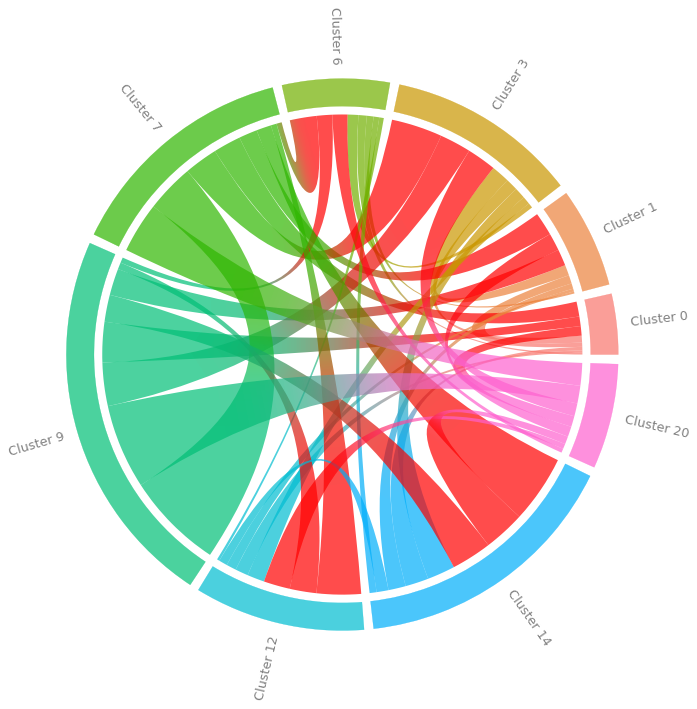

In [63]:

import os
import sys
sys.path.append(os.path.abspath(".."))

import matplotlib
import matplotlib.pyplot as plt
import numpy as np


allNames = ["Cluster " + x.split(".")[1] for x in allElems]
cmap = matplotlib.cm.get_cmap('viridis')
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=len(allNames))

redsMap =  matplotlib.cm.get_cmap('Reds')
normReds = matplotlib.colors.Normalize(vmin=0.0, vmax=4+2)

allColors = []
redI = 0
for i, name in enumerate(allNames):
    clusterID = name.split(" ")[1]
    clusterColor = cluster2color[clusterID]
    allColors.append(clusterColor)

def getArcColor(i, j, n):

    if int(allElems[i].split(".")[1]) in sel_clusters_smc and int(allElems[j].split(".")[1]) in sel_clusters_mac:
        return "red"
    
    return allColors[i]


fig, ax = plt.subplots(figsize=(10,10))
chord_diagram(flux, allNames, ax=ax, gap=0.03, use_gradient=True, colors=allColors, sort="size", rotate_names=True, fontcolor="grey", arccolors=getArcColor)

plt.show()


In [35]:
sorted(csScoresij[("mean.14", "mean.7")], key=lambda x: x[2], reverse=True)

[('CCL19', 'CCR7', 150.555217538268),
 ('CCL2', 'CCR2', 55.94945745288405),
 ('CCL19', 'CCRL2', 55.76321982028113),
 ('CCL11', 'CCR2', 33.846553931505326),
 ('CCL2', 'CCR5', 30.573491015205118),
 ('CCL7', 'CCR2', 28.98734680884922),
 ('CXCL12', 'CXCR4', 28.85609922306975),
 ('CXCL1', 'CXCR2', 28.817757009345797),
 ('XCL1', 'XCR1', 28.36363636363634),
 ('CCL19', 'CXCR3', 19.514464168310358),
 ('CCL11', 'CCR5', 18.495394944481124),
 ('CCL2', 'CCR4', 17.529411764705902),
 ('CCL2', 'CCR3', 17.529411764705902),
 ('CCL8', 'CCR2', 16.367936270848876),
 ('CCL19', 'ACKR4', 14.7065527065527),
 ('CCL7', 'CCR1', 14.649700026749171),
 ('CCL11', 'CCR3', 10.604395604395599),
 ('CXCL10', 'CXCR3', 10.489010989011021),
 ('CCL7', 'CCR3', 9.08196721311475),
 ('CCL8', 'CCR5', 8.944232442926978),
 ('CCL8', 'CCR1', 8.272069810531336),
 ('CXCL12', 'ACKR3', 7.222939346811826),
 ('CXCL12', 'CXCR3', 6.609851656896779),
 ('CCL8', 'CCR3', 5.12820512820513),
 ('CXCL5', 'CXCR2', 4.4210526315789505),
 ('CXCL2', 'CXCR

In [14]:
sorted(csScoresij[("mean.14", "mean.9")], key=lambda x: x[2], reverse=True)

[('CCL2', 'CCR2', 54.98952457695407),
 ('CCL11', 'CCR2', 33.26584374529575),
 ('CCL19', 'CCRL2', 32.45584045584047),
 ('CXCL1', 'CXCR2', 28.817757009345797),
 ('CCL7', 'CCR2', 28.49000673703117),
 ('CCL2', 'CCR5', 24.646053293112214),
 ('CCL2', 'CCR4', 17.529411764705902),
 ('CCL19', 'CXCR3', 17.301826713591353),
 ('CCL8', 'CCR2', 16.08710923779416),
 ('CCL7', 'CCR1', 16.04608072737295),
 ('CCL11', 'CCR5', 14.90959894806052),
 ('CCL19', 'ACKR4', 14.7065527065527),
 ('CXCL12', 'CXCR4', 13.369333444725788),
 ('XCL1', 'XCR1', 13.0),
 ('CXCL10', 'CXCR3', 9.299719887955158),
 ('CCL8', 'CCR1', 9.06054729584144),
 ('CCL8', 'CCR5', 7.21016874863031),
 ('CXCL12', 'CXCR3', 5.86039703595278),
 ('CXCL12', 'ACKR3', 5.534819422844306),
 ('CXCL5', 'CXCR2', 4.4210526315789505),
 ('CXCL2', 'CXCR2', 3.85714285714286),
 ('CCL3', 'CCR1', 3.1550120048019368),
 ('CCL5', 'CCR1', 3.140989729225035),
 ('CCL3', 'CCR5', 2.510683760683774),
 ('CCL5', 'CCR5', 2.4995251661918427),
 ('CXCL9', 'CXCR3', 2.352941176470

In [90]:
smcElems = ["mean.{}".format(x) for x in sel_clusters_smc]
macElems = ["mean.{}".format(x) for x in sel_clusters_mac]

In [94]:
useDF = df[df.clusterI.isin(smcElems) & df.clusterJ.isin(macElems)]
newDFrows = []
for rowID, row in useDF.iterrows():
    #print(rowID, row["clusterI"], row["clusterJ"], row["ligand"], row["receptor"], row["score"])
    
    newDFrows.append( ("{} -> {}".format(row["ligand"], row["receptor"]), "{} -> {}".format(row["clusterI"], row["clusterJ"]), row["score"])  )

mapDF = pd.DataFrame(newDFrows, columns=["LR Pair", "Cluster", "Score"])


In [97]:
1+1

2

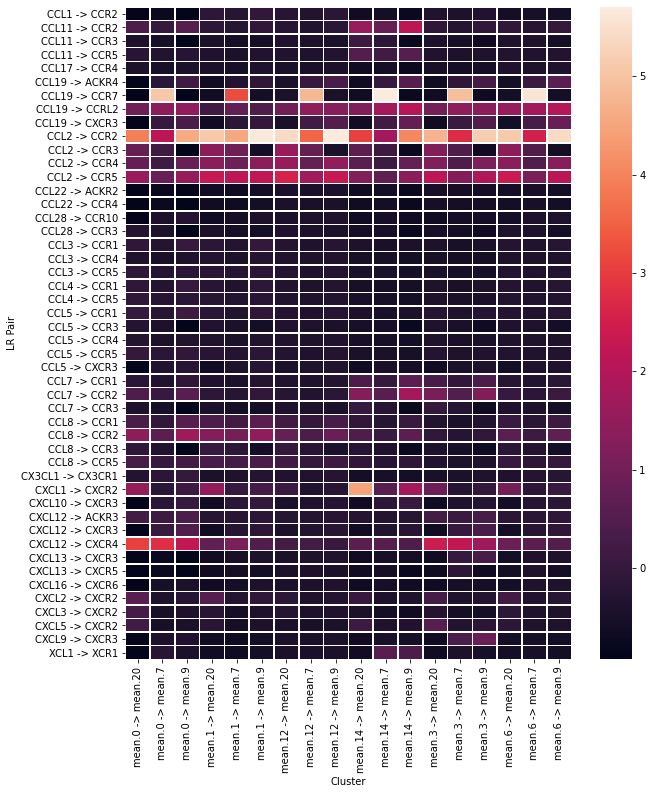

In [95]:

fig, heat = plt.subplots(figsize = (10,12))
sns.heatmap(mapDF.pivot("LR Pair", "Cluster", "Score").apply(stats.zscore), linewidths=.5, xticklabels=True, yticklabels=True)

In [87]:
import scipy.stats as stats

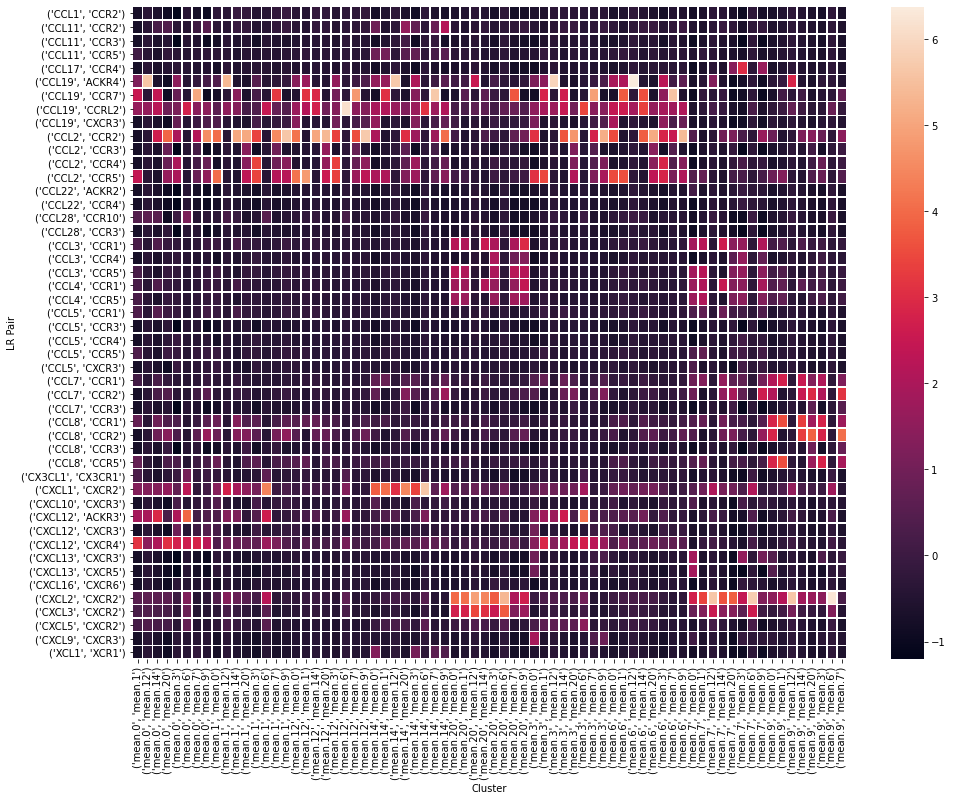

In [21]:
def communication_score(expr1, expr2):
    return expr1 * expr2

    
sel_clusters_smc = [0,1,6,12,14,18]
sel_clusters_mac = [7,9,20]

smcElems = ["mean.{}".format(x) for x in sel_clusters_smc]
macElems = ["mean.{}".format(x) for x in sel_clusters_mac]

color2grp = [
("#F8766D", "0"),
("#EC823C", "1"),
("#DD8D00", "2"),
("#CA9700", "3"),
("#B3A000", "4"),
("#97A900", "5"),
("#71B000", "6"),
("#2FB600", "7"),
("#00BB4B", "8"),
("#00BF76", "9"),
("#00C098", "10"),
("#00C0B7", "11"),
("#00BDD1", "12"),
("#00B7E8", "13"),
("#00AEFA", "14"),
("#3DA1FF", "15"),
("#8F91FF", "16"),
("#BE80FF", "17"),
("#DE71F9", "18"),
("#F265E7", "19"),
("#FE61CF", "20"),
("#FF64B3", "21"),
("#FF6C92", "22")]

cluster2color = {}
for x in color2grp:
    cluster2color[x[1]] = x[0]

def make_space_above(ax, topmargin=1):
    """ increase figure size to make topmargin (in inches) space for 
        titles, without changing the axes sizes"""
    fig = ax.figure
    s = fig.subplotpars
    w, h = fig.get_size_inches()

    figh = h - (1-s.top)*h  + topmargin
    fig.subplots_adjust(bottom=s.bottom*h/figh, top=1-topmargin/figh)
    fig.set_figheight(figh)




test/cluster_mean_expr_hybridSMCwtwk16.tsv
hybridSMCwtwk16
total com scores 24288
{'mean.18', 'mean.14', 'mean.1', 'mean.20', 'mean.0', 'mean.9', 'mean.12', 'mean.6', 'mean.7'}
mean.0 mean.7 12.041024176660928 147.80123987483958 0.15433155080213917
mean.1 mean.7 36.75005127854516 233.10326340095278 0.47103072983354954
mean.6 mean.7 34.22038220474381 267.1007585830376 0.4386075949367108
mean.0 mean.9 11.834434595756086 95.37082511727245 0.1516836622228265
mean.1 mean.9 36.11952537140663 163.85391887509132 0.46294918796120366
mean.6 mean.9 33.633258193168075 153.43595599917194 0.431082341445792
mean.12 mean.7 78.02049622437947 440.7611558806597 1.0
mean.12 mean.9 76.68188736681866 264.7569183978927 0.9828428563987711
mean.14 mean.7 55.94945745288405 672.161388968951 0.7171122994652427
mean.14 mean.9 54.98952457695407 401.1896875989269 0.70480870076511
mean.18 mean.7 10.50187911055432 124.08333431932286 0.1346041055718477
mean.18 mean.9 10.321696862571793 81.23755040817962 0.1322946836032

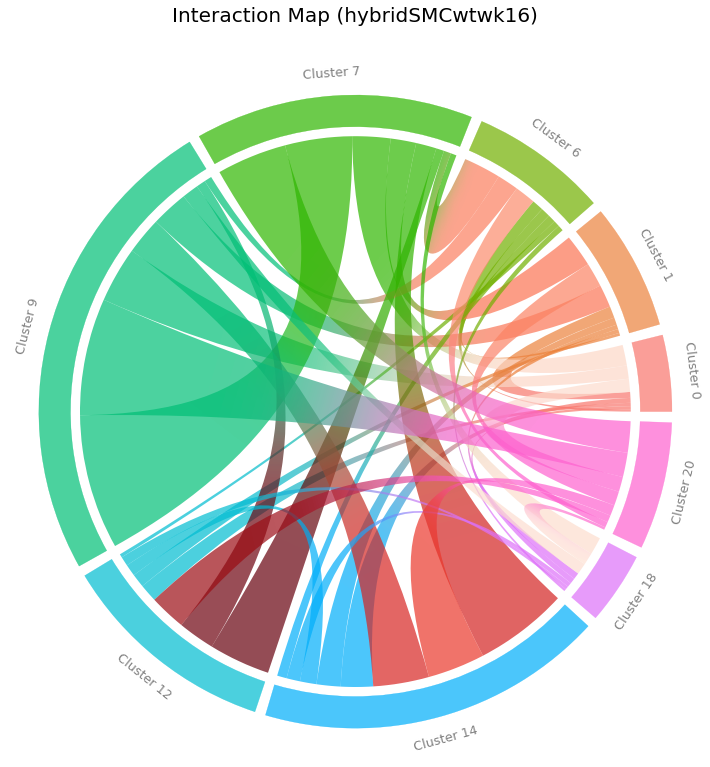

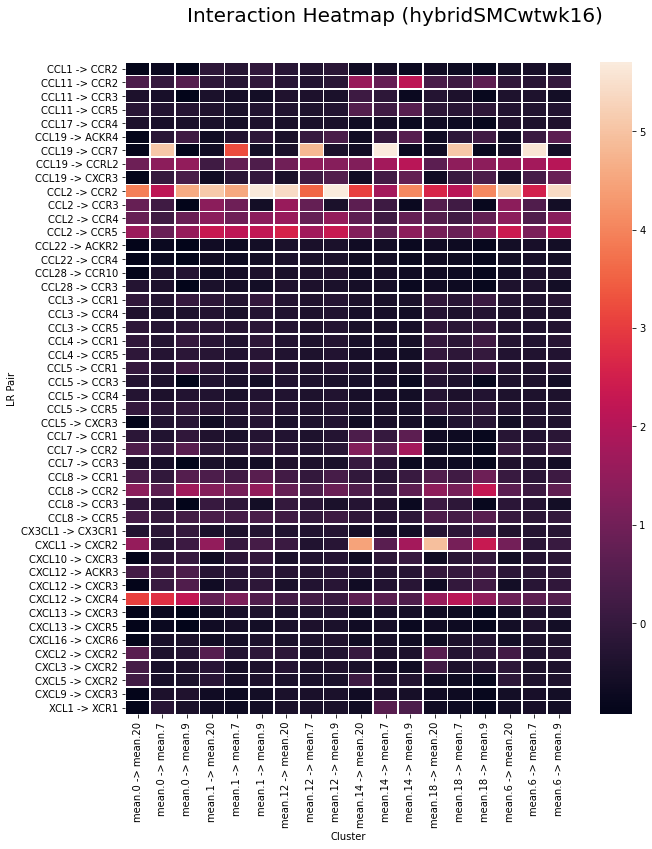

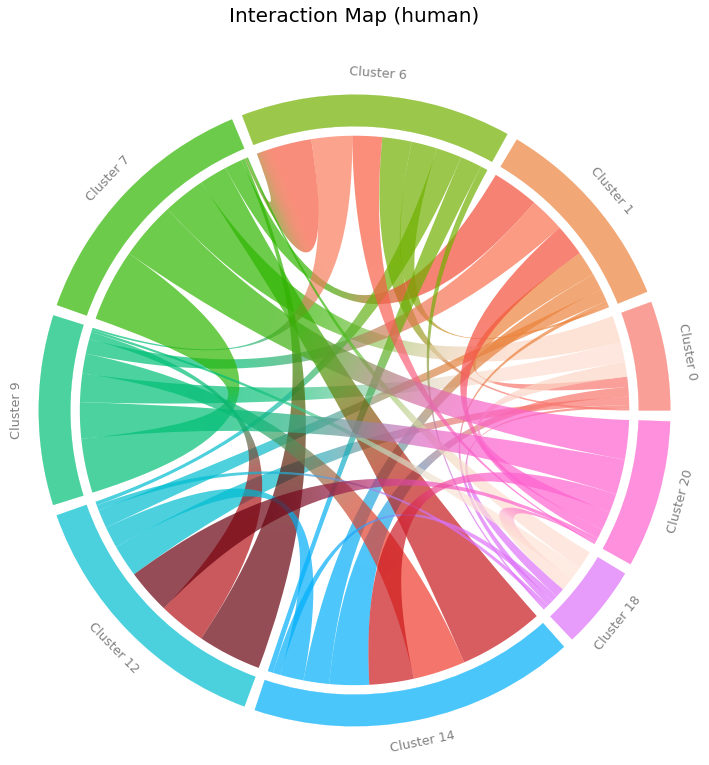

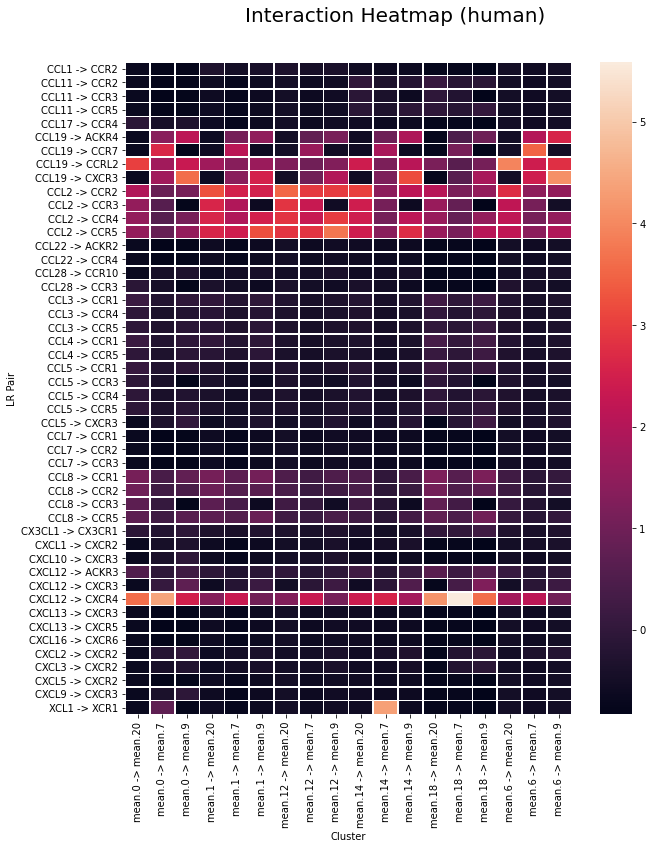

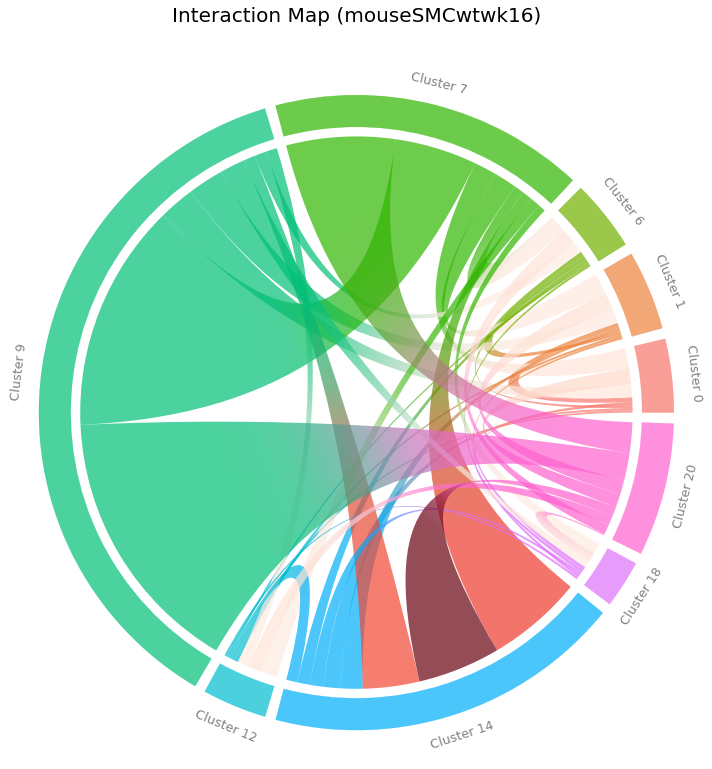

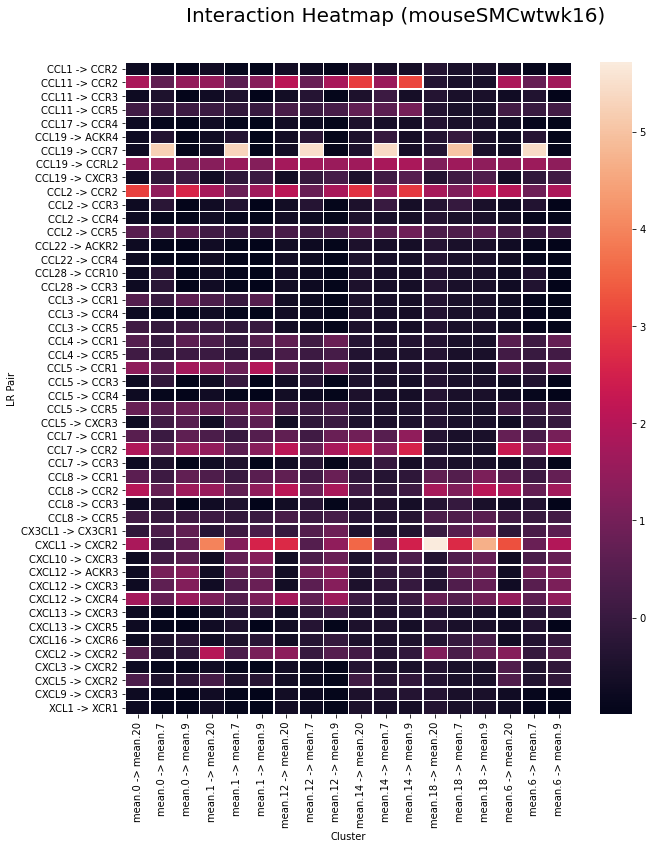

In [22]:
for inputfile in [ "test/cluster_mean_expr_hybridSMCwtwk16.tsv","test/cluster_mean_expr_human.tsv","test/cluster_mean_expr_mouseSMCwtwk16.tsv" ]:
    print(inputfile)
    
    condition = os.path.splitext(inputfile)[0].split("_")[3]
    print(condition)

    scExpr = pd.read_csv(inputfile, sep="\t")
    scExpr = scExpr.set_index("gene")
    scExpr = scExpr.apply(pd.to_numeric, errors='ignore')

    clusterNames = natsorted([x for x in scExpr.columns])

    containedLigs = natsorted([ x for x in scExpr.index if x.upper() in ccLigands ])
    exprLigands = scExpr.loc[containedLigs, clusterNames]

    containedRecs = natsorted([ x for x in scExpr.index if x.upper() in ccReceptors ])
    exprRecs = scExpr.loc[containedRecs, clusterNames]

    csScores = defaultdict(lambda : defaultdict(list))
    csScoresij = defaultdict(list)

    allCsScores = []

    cslrijCount = 0
    for ligand, receptor, inttype in set(lr_interactions):

        if inttype != "AG":
            continue

        if not ligand in containedLigs:
            continue
        if not receptor in containedRecs:
            continue

        for clusterI in clusterNames:
            for clusterJ in clusterNames:

                if clusterI == clusterJ:
                    continue

                exprLigand = scExpr.loc[ligand, clusterI]
                exprRecept = scExpr.loc[receptor, clusterJ]

                cslrijCount += 1

                cslrij = communication_score(exprLigand, exprRecept)
                csScores[(ligand, receptor)][(clusterI, clusterJ)] = cslrij
                csScoresij[(clusterI, clusterJ)].append((ligand, receptor, cslrij))
                

                allCsScores.append((ligand, receptor, clusterI, clusterJ, cslrij))

    print("total com scores", cslrijCount)

    df = pd.DataFrame(allCsScores, columns=["ligand", "receptor", "clusterI", "clusterJ", "score"])
    df

    sumDF = df.groupby(["clusterI", "clusterJ"]).agg("sum")
    sumDF["zscore"] = (sumDF["score"] - sumDF["score"].mean())/sumDF["score"].std(ddof=0)
    sumDF

    selDF = sumDF#sumDF[sumDF.zscore > 2]

    allElems = set()
    for idx, row in selDF.iterrows():

        if not int(idx[0].split(".")[1]) in sel_clusters_mac+sel_clusters_smc:
            continue
        if not int(idx[1].split(".")[1]) in sel_clusters_mac+sel_clusters_smc:
            continue

        allElems.add(idx[0])
        allElems.add(idx[1])

    print(allElems)
    allElems = natsorted(allElems)

    flux = np.zeros((len(allElems), len(allElems)))

    for idx, row in selDF.iterrows():
        iElem = idx[0]
        jElem = idx[1]

        if not iElem in allElems:
            continue
        if not jElem in allElems:
            continue

        flux[allElems.index(iElem), allElems.index(jElem)] += row["score"]
        #flux[allElems.index(jElem), allElems.index(iElem)] += row["score"]

    allNames = ["Cluster " + x.split(".")[1] for x in allElems]
    cmap = matplotlib.cm.get_cmap('viridis')
    norm = matplotlib.colors.Normalize(vmin=0.0, vmax=len(allNames))

    redsMap =  matplotlib.cm.get_cmap('Reds')
    normReds = matplotlib.colors.Normalize(vmin=0.0, vmax=1)

    allColors = []
    redI = 0
    for i, name in enumerate(allNames):
        clusterID = name.split(" ")[1]
        clusterColor = cluster2color[clusterID]
        allColors.append(clusterColor)

    ccl2ccr2ScoreMax = 0
    for i, nameI in enumerate(allElems):
        for j, nameJ in enumerate(allElems):

            if not (allElems[i] in smcElems and allElems[j] in macElems):
                continue

            ccl2ccr2ScoreMax = max(csScores[("CCL2", "CCR2")][(allElems[i], allElems[j])], ccl2ccr2ScoreMax)


    def getArcColor(i, j, n):

        if int(allElems[i].split(".")[1]) in sel_clusters_smc and int(allElems[j].split(".")[1]) in sel_clusters_mac:
            ccr2ccl2Score = csScores[("CCL2", "CCR2")][(allElems[i], allElems[j])]
            totalScore = sum([x[2] for x in csScoresij[(allElems[i], allElems[j])] if allElems[i] in smcElems and allElems[j] in macElems])
            print(allElems[i], allElems[j], ccr2ccl2Score, totalScore, ccr2ccl2Score/ ccl2ccr2ScoreMax)
            return redsMap(ccr2ccl2Score/ccl2ccr2ScoreMax)
        
        return allColors[i]


    fig, ax = plt.subplots(figsize=(10,10))
    chord_diagram(flux, allNames, ax=ax, gap=0.03, use_gradient=True, colors=allColors, sort="size", rotate_names=False, fontcolor="grey", arccolors=getArcColor)
    plt.suptitle("Interaction Map ({})".format(condition), fontsize =20)
    make_space_above(ax, topmargin=1)   
    plt.savefig("chord_plot.{}.png".format(inputfile.split("/")[1]))
    plt.savefig("chord_plot.{}.pdf".format(inputfile.split("/")[1]))

    useDF = df[df.clusterI.isin(smcElems) & df.clusterJ.isin(macElems)]
    newDFrows = []
    for rowID, row in useDF.iterrows():
        #print(rowID, row["clusterI"], row["clusterJ"], row["ligand"], row["receptor"], row["score"])
        
        newDFrows.append( ("{} -> {}".format(row["ligand"], row["receptor"]), "{} -> {}".format(row["clusterI"], row["clusterJ"]), row["score"])  )

    mapDF = pd.DataFrame(newDFrows, columns=["LR Pair", "Cluster", "Score"])

    fig, heat = plt.subplots(figsize = (11,12))
    sns.heatmap(mapDF.pivot("LR Pair", "Cluster", "Score").apply(stats.zscore), linewidths=.5, xticklabels=True, yticklabels=True)
    plt.suptitle("Interaction Heatmap ({})".format(condition), fontsize =20)
    
    make_space_above(heat, topmargin=1)    

    plt.savefig("matrix_plot.{}.png".format(inputfile.split("/")[1]))
    plt.savefig("matrix_plot.{}.pdf".format(inputfile.split("/")[1]))


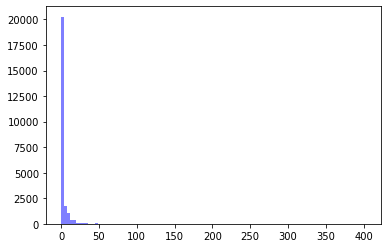

In [15]:
allScores = []

for clusterCom in csScoresij:
    for interact in csScoresij[clusterCom]:
        score = interact[2]
        allScores.append(score)

n, bins, patches = plt.hist(allScores, 100, facecolor='blue', alpha=0.5)

In [8]:
"""
Tools to draw a chord diagram in python
"""

from collections.abc import Sequence

import matplotlib.patches as patches

from matplotlib.colors import ColorConverter
from matplotlib.path import Path

import numpy as np
import scipy.sparse as ssp

from mpl_chord_diagram.gradient import gradient
from mpl_chord_diagram.utilities import _get_normed_line, dist, polar2xy

LW = 0.3


def chord_diagram(mat, names=None, order=None, width=0.1, pad=2., gap=0.03,
                  chordwidth=0.7, ax=None, colors=None, cmap=None, alpha=0.7,
                  use_gradient=False, chord_colors=None, show=False, arccolors=None, **kwargs):
    """
    Plot a chord diagram.

    Parameters
    ----------
    mat : square matrix
        Flux data, mat[i, j] is the flux from i to j
    names : list of str, optional (default: no names)
        Names of the nodes that will be displayed (must be ordered as the
        matrix entries).
    order : list, optional (default: order of the matrix entries)
        Order in which the arcs should be placed around the trigonometric
        circle.
    width : float, optional (default: 0.1)
        Width/thickness of the ideogram arc.
    pad : float, optional (default: 2)
        Distance between two neighboring ideogram arcs. Unit: degree.
    gap : float, optional (default: 0)
        Distance between the arc and the beginning of the cord.
    chordwidth : float, optional (default: 0.7)
        Position of the control points for the chords, controlling their shape.
    ax : matplotlib axis, optional (default: new axis)
        Matplotlib axis where the plot should be drawn.
    colors : list, optional (default: from `cmap`)
        List of user defined colors or floats.
    cmap : str or colormap object (default: viridis)
        Colormap that will be used to color the arcs and chords by default.
        See `chord_colors` to use different colors for chords.
    alpha : float in [0, 1], optional (default: 0.7)
        Opacity of the chord diagram.
    use_gradient : bool, optional (default: False)
        Whether a gradient should be use so that chord extremities have the
        same color as the arc they belong to.
    chord_colors : str, or list of colors, optional (default: None)
        Specify color(s) to fill the chords differently from the arcs.
        When the keyword is not used, chord colors default to the colomap given
        by `colors`.
        Possible values for `chord_colors` are:

        * a single color (do not use an RGB tuple, use hex format instead),
          e.g. "red" or "#ff0000"; all chords will have this color
        * a list of colors, e.g. ``["red", "green", "blue"]``, one per node
          (in this case, RGB tuples are accepted as entries to the list).
          Each chord will get its color from its associated source node, or
          from both nodes if `use_gradient` is True.
    show : bool, optional (default: False)
        Whether the plot should be displayed immediately via an automatic call
        to `plt.show()`.
    arccolors : function to retrieve specific colors for arcs
    kwargs : keyword arguments
        Available kwargs are:

        ================  ==================  ===============================
              Name               Type           Purpose and possible values
        ================  ==================  ===============================
        fontcolor         str or list         Color of the names
        fontsize          int                 Size of the font for names
        rotate_names      (list of) bool(s)   Rotate names by 90°
        sort              str                 Either "size" or "distance"
        zero_entry_size   float               Size of zero-weight reciprocal
        ================  ==================  ===============================
    """
    import matplotlib.pyplot as plt

    if ax is None:
        _, ax = plt.subplots()

    # copy matrix and set a minimal value for visibility of zero fluxes
    is_sparse = ssp.issparse(mat)

    if is_sparse:
        mat = mat.tocsr(copy=True)
    else:
        mat = np.array(mat, copy=True)

    # mat[i, j]:  i -> j
    num_nodes = mat.shape[0]

    # set entry size for zero entries that have a nonzero reciprocal
    min_deg  = kwargs.get("zero_entry_size", 0.5)
    min_deg *= mat.sum() / (360 - num_nodes*pad)

    if is_sparse:
        nnz = mat.nonzero()

        for i, j in zip(*nnz):
            if mat[j, i] == 0:
                mat[j, i] = min_deg
    else:
        zeros = np.argwhere(mat == 0)

        for (i, j) in zeros:
            if mat[j, i] != 0:
                mat[i, j] = min_deg

    # check name rotations
    rotate_names = kwargs.get("rotate_names", False)

    if isinstance(rotate_names, Sequence):
        assert len(rotate_names) == num_nodes, \
            "Wrong number of entries in 'rotate_names'."
    else:
        rotate_names = [rotate_names]*num_nodes

    # check order
    if order is not None:
        mat = mat[order][:, order]

        rotate_names = [rotate_names[i] for i in order]

        if names is not None:
            names = [names[i] for i in order]

    # sum over rows
    x = mat.sum(axis=1).A1 if is_sparse else mat.sum(axis=1)

    # configure colors
    if colors is None:
        colors = np.linspace(0, 1, num_nodes)

    fontcolor = kwargs.get("fontcolor", "k")

    if isinstance(fontcolor, str):
        fontcolor = [fontcolor]*num_nodes
    else:
        assert len(fontcolor) == num_nodes, \
            "One fontcolor per node is required."

    if cmap is None:
        cmap = "viridis"

    if isinstance(colors, (list, tuple, np.ndarray)):
        assert len(colors) == num_nodes, "One color per node is required. {} colors vs {} nodes".format(len(colors), num_nodes)

        # check color type
        first_color = colors[0]

        if isinstance(first_color, (int, float, np.integer)):
            cm = plt.get_cmap(cmap)
            colors = cm(colors)[:, :3]
        else:
            colors = [ColorConverter.to_rgb(c) for c in colors]
    else:
        raise ValueError("`colors` should be a list.")

    if chord_colors is None:
       chord_colors = colors
    else:
        try:
            chord_colors = [ColorConverter.to_rgb(chord_colors)] * num_nodes
        except ValueError:
            assert len(chord_colors) == num_nodes, \
                "If `chord_colors` is a list of colors, it should include " \
                "one color per node (here {} colors).".format(num_nodes)

    # find position for each start and end
    y = x / np.sum(x).astype(float) * (360 - pad*len(x))

    pos = {}
    arc = []
    nodePos = []
    rotation = []
    start = 0

    # compute all values and optionally apply sort
    for i in range(num_nodes):
        end = start + y[i]
        arc.append((start, end))
        angle = 0.5*(start+end)

        if -30 <= angle <= 180:
            angle -= 90
            rotation.append(False)
        else:
            angle -= 270
            rotation.append(True)

        nodePos.append(
            tuple(polar2xy(1.05, 0.5*(start + end)*np.pi/180.)) + (angle,))

        z = _get_normed_line(mat, i, x, start, end, is_sparse)

        # sort chords
        ids = None

        if kwargs.get("sort", "size") == "size":
            ids = np.argsort(z)
        elif kwargs["sort"] == "distance":
            remainder = 0 if num_nodes % 2 else -1

            ids  = list(range(i - int(0.5*num_nodes), i))[::-1]
            ids += [i]
            ids += list(range(i + int(0.5*num_nodes) + remainder, i, -1))

            # put them back into [0, num_nodes[
            ids = np.array(ids)
            ids[ids < 0] += num_nodes
            ids[ids >= num_nodes] -= num_nodes
        else:
            raise ValueError("Invalid `sort`: '{}'".format(kwargs["sort"]))

        z0 = start

        for j in ids:
            pos[(i, j)] = (z0, z0 + z[j])
            z0 += z[j]

        start = end + pad

    # plot
    for i in range(len(x)):
        color = colors[i]

        # plot the arcs
        start, end = arc[i]

        ideogram_arc(start=start, end=end, radius=1.0, color=color,
                     width=width, alpha=alpha, ax=ax)

        start, end = pos[(i, i)]

        chord_color = chord_colors[i]

        # plot self-chords
        if mat[i, i] > 0:
            arc_color = chord_color
            if not arccolors is None:
                arc_color = arccolors(i,i, mat[i,i])

            self_chord_arc(start, end, radius=1 - width - gap,
                           chordwidth=0.7*chordwidth, color=arc_color,
                           alpha=alpha, ax=ax)

        # plot all other chords
        for j in range(i):
            cend = chord_colors[j]

            arc_color = chord_color
            if not arccolors is None:
                arc_color = arccolors(i,j, mat[i,j])
                cend = arccolors(j,i, mat[j,i])

            start1, end1 = pos[(i, j)]
            start2, end2 = pos[(j, i)]

            if mat[i, j] > 0 or mat[j, i] > 0:
                chord_arc(
                    start1, end1, start2, end2, radius=1 - width - gap,
                    chordwidth=chordwidth, color=arc_color, cend=cend,
                    alpha=alpha, ax=ax, use_gradient=use_gradient)

    # add names if necessary
    if names is not None:
        assert len(names) == num_nodes, "One name per node is required."

        prop = {
            "fontsize": kwargs.get("fontsize", 16*0.8),
            "ha": "center",
            "va": "center",
            "rotation_mode": "anchor"
        }

        for i, (pos, name, r) in enumerate(zip(nodePos, names, rotation)):
            rotate = rotate_names[i]
            pp = prop.copy()
            pp["color"] = fontcolor[i]

            if rotate:
                angle  = np.average(arc[i])
                rotate = 90

                if 90 < angle < 180 or 270 < angle:
                    rotate = -90

                if 90 < angle < 270:
                    pp["ha"] = "right"
                else:
                    pp["ha"] = "left"
            elif r:
                pp["va"] = "top"
            else:
                pp["va"] = "bottom"

            ax.text(pos[0], pos[1], name, rotation=pos[2] + rotate, **pp)

    # configure axis
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)

    ax.set_aspect(1)
    ax.axis('off')

    plt.tight_layout()

    if show:
        plt.show()

    return nodePos



In [10]:

# ------------ #
# Subfunctions #
# ------------ #

def initial_path(start, end, radius, width, factor=4/3):
    ''' First 16 vertices and 15 instructions are the same for everyone '''
    if start > end:
        start, end = end, start

    start *= np.pi/180.
    end   *= np.pi/180.

    # optimal distance to the control points
    # https://stackoverflow.com/questions/1734745/
    # how-to-create-circle-with-b%C3%A9zier-curves
    # use 16-vertex curves (4 quadratic Beziers which accounts for worst case
    # scenario of 360 degrees)
    inner = radius*(1-width)
    opt   = factor * np.tan((end-start)/ 16.) * radius
    inter1 = start*(3./4.)+end*(1./4.)
    inter2 = start*(2./4.)+end*(2./4.)
    inter3 = start*(1./4.)+end*(3./4.)

    verts = [
        polar2xy(radius, start),
        polar2xy(radius, start) + polar2xy(opt, start+0.5*np.pi),
        polar2xy(radius, inter1) + polar2xy(opt, inter1-0.5*np.pi),
        polar2xy(radius, inter1),
        polar2xy(radius, inter1),
        polar2xy(radius, inter1) + polar2xy(opt, inter1+0.5*np.pi),
        polar2xy(radius, inter2) + polar2xy(opt, inter2-0.5*np.pi),
        polar2xy(radius, inter2),
        polar2xy(radius, inter2),
        polar2xy(radius, inter2) + polar2xy(opt, inter2+0.5*np.pi),
        polar2xy(radius, inter3) + polar2xy(opt, inter3-0.5*np.pi),
        polar2xy(radius, inter3),
        polar2xy(radius, inter3),
        polar2xy(radius, inter3) + polar2xy(opt, inter3+0.5*np.pi),
        polar2xy(radius, end) + polar2xy(opt, end-0.5*np.pi),
        polar2xy(radius, end)
    ]

    codes = [
        Path.MOVETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
    ]

    return start, end, verts, codes


def ideogram_arc(start, end, radius=1., width=0.2, color="r", alpha=0.7,
                 ax=None):
    '''
    Draw an arc symbolizing a region of the chord diagram.

    Parameters
    ----------
    start : float (degree in 0, 360)
        Starting degree.
    end : float (degree in 0, 360)
        Final degree.
    radius : float, optional (default: 1)
        External radius of the arc.
    width : float, optional (default: 0.2)
        Width of the arc.
    ax : matplotlib axis, optional (default: not plotted)
        Axis on which the arc should be plotted.
    color : valid matplotlib color, optional (default: "r")
        Color of the arc.

    Returns
    -------
    verts, codes : lists
        Vertices and path instructions to draw the shape.
    '''
    start, end, verts, codes = initial_path(start, end, radius, width)

    opt    = 4./3. * np.tan((end-start)/ 16.) * radius
    inner  = radius*(1-width)
    inter1 = start*(3./4.) + end*(1./4.)
    inter2 = start*(2./4.) + end*(2./4.)
    inter3 = start*(1./4.) + end*(3./4.)

    verts += [
        polar2xy(inner, end),
        polar2xy(inner, end) + polar2xy(opt*(1-width), end-0.5*np.pi),
        polar2xy(inner, inter3) + polar2xy(opt*(1-width), inter3+0.5*np.pi),
        polar2xy(inner, inter3),
        polar2xy(inner, inter3),
        polar2xy(inner, inter3) + polar2xy(opt*(1-width), inter3-0.5*np.pi),
        polar2xy(inner, inter2) + polar2xy(opt*(1-width), inter2+0.5*np.pi),
        polar2xy(inner, inter2),
        polar2xy(inner, inter2),
        polar2xy(inner, inter2) + polar2xy(opt*(1-width), inter2-0.5*np.pi),
        polar2xy(inner, inter1) + polar2xy(opt*(1-width), inter1+0.5*np.pi),
        polar2xy(inner, inter1),
        polar2xy(inner, inter1),
        polar2xy(inner, inter1) + polar2xy(opt*(1-width), inter1-0.5*np.pi),
        polar2xy(inner, start) + polar2xy(opt*(1-width), start+0.5*np.pi),
        polar2xy(inner, start),
        polar2xy(radius, start),
    ]

    codes += [
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.CLOSEPOLY,
    ]

    if ax is not None:
        path  = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color, alpha=alpha,
                                  edgecolor=color, lw=LW)
        ax.add_patch(patch)

    return verts, codes


def chord_arc(start1, end1, start2, end2, radius=1.0, pad=2, chordwidth=0.7,
              ax=None, color="r", cend="r", alpha=0.7, use_gradient=False):
    '''
    Draw a chord between two regions (arcs) of the chord diagram.

    Parameters
    ----------
    start1 : float (degree in 0, 360)
        Starting degree.
    end1 : float (degree in 0, 360)
        Final degree.
    start2 : float (degree in 0, 360)
        Starting degree.
    end2 : float (degree in 0, 360)
        Final degree.
    radius : float, optional (default: 1)
        External radius of the arc.
    chordwidth : float, optional (default: 0.2)
        Width of the chord.
    ax : matplotlib axis, optional (default: not plotted)
        Axis on which the chord should be plotted.
    color : valid matplotlib color, optional (default: "r")
        Color of the chord or of its beginning if `use_gradient` is True.
    cend : valid matplotlib color, optional (default: "r")
        Color of the end of the chord if `use_gradient` is True.
    alpha : float, optional (default: 0.7)
        Opacity of the chord.
    use_gradient : bool, optional (default: False)
        Whether a gradient should be use so that chord extremities have the
        same color as the arc they belong to.

    Returns
    -------
    verts, codes : lists
        Vertices and path instructions to draw the shape.
    '''
    chordwidth2 = chordwidth

    dtheta1 = min((start1 - end2) % 360, (end2 - start1) % 360)
    dtheta2 = min((end1 - start2) % 360, (start2 - end1) % 360)

    start1, end1, verts, codes = initial_path(start1, end1, radius, chordwidth)

    start2, end2, verts2, _ = initial_path(start2, end2, radius, chordwidth)

    chordwidth2 *= np.clip(0.4 + (dtheta1 - 2*pad) / (15*pad), 0.2, 1)

    chordwidth *= np.clip(0.4 + (dtheta2 - 2*pad) / (15*pad), 0.2, 1)

    rchord  = radius * (1-chordwidth)
    rchord2 = radius * (1-chordwidth2)

    verts += [polar2xy(rchord, end1), polar2xy(rchord, start2)] + verts2

    verts += [
        polar2xy(rchord2, end2),
        polar2xy(rchord2, start1),
        polar2xy(radius, start1),
    ]

    codes += [
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.LINETO,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
    ]

    if ax is not None:
        path = Path(verts, codes)

        if use_gradient:
            # find the start and end points of the gradient
            points, min_angle = None, None

            if dtheta1 < dtheta2:
                points = [
                    polar2xy(radius, start1),
                    polar2xy(radius, end2),
                ]

                min_angle = dtheta1
            else:
                points = [
                    polar2xy(radius, end1),
                    polar2xy(radius, start2),
                ]

                min_angle = dtheta1

            # make the patch
            patch = patches.PathPatch(path, facecolor="none",
                                      edgecolor="none", lw=LW)
            ax.add_patch(patch)  # this is required to clip the gradient

            # make the grid
            x = y = np.linspace(-1, 1, 100)
            meshgrid = np.meshgrid(x, y)

            gradient(points[0], points[1], min_angle, color, cend, meshgrid,
                     patch, ax, alpha)
        else:
            patch = patches.PathPatch(path, facecolor=color, alpha=alpha,
                                      edgecolor=color, lw=LW)

            idx = 16

            ax.add_patch(patch)

    return verts, codes


def self_chord_arc(start, end, radius=1.0, chordwidth=0.7, ax=None,
                   color=(1,0,0), alpha=0.7):
    start, end, verts, codes = initial_path(start, end, radius, chordwidth)

    rchord = radius * (1 - chordwidth)

    verts += [
        polar2xy(rchord, end),
        polar2xy(rchord, start),
        polar2xy(radius, start),
    ]

    codes += [
        Path.CURVE4,
        Path.CURVE4,
        Path.CURVE4,
    ]

    if ax is not None:
        path  = Path(verts, codes)
        patch = patches.PathPatch(path, facecolor=color, alpha=alpha,
                                  edgecolor=color, lw=LW)
        ax.add_patch(patch)

    return verts, codes